---

# 🩺 Breast Cancer Classification Project  

Welcome to the **Breast Cancer Prediction Project** 💻.  
In this notebook, we will:  
- 📂 Load & explore the dataset  
- 🧹 Clean and preprocess the data  
- 📊 Perform exploratory data analysis (EDA)  
- ⚖️ Handle class imbalance  
- 🤖 Train and evaluate multiple machine learning models  
- 🎯 Focus on maximizing **Recall** (critical in medical diagnosis)  
- 💾 Save the best model for deployment  


---

### 🛠️ Setup & Imports

We start by importing all the required libraries for the project:

- **Data Handling** 📊: `pandas`, `numpy`  
- **Visualization** 🎨: `matplotlib`, `seaborn`  
- **Preprocessing & Splitting** ✂️: `train_test_split`, `StandardScaler`  
- **Models** 🤖: Logistic Regression, SVM, KNN, Decision Tree, Random Forest, Gradient Boosting, AdaBoost, XGBoost ⚡  
- **Evaluation** 📏: Accuracy, Confusion Matrix, Classification Report  
- **Persistence** 💾: `joblib` for saving models  
- **Warnings** 🚨: Suppressed for clean output


In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
)

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

---

### 📂 Load Dataset

Import the Breast Cancer dataset into a **Pandas DataFrame** for analysis and modeling:

- **Source** 🗂️: Local CSV file (`../Data/data.csv`)  
- **Format** 📑: Tabular data containing features and the target variable  
- **Purpose** 🎯: This will be the main dataset used for preprocessing, exploration, and model training

In [225]:
data = pd.read_csv('../Data/data.csv')

---

### 👀 Preview the Data

Display the **first 5 rows** of the dataset to:  
- Verify that the data was loaded correctly ✅  
- Get a quick look at the feature names 🏷️  
- Understand the structure and sample values 🔍

In [226]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


---

### ℹ️ Dataset Information

Use `.info()` to check:  
- Number of rows and columns 🔢  
- Data types of each feature 🏷️  
- Non-null counts to detect any **missing values** 🚨  
- Memory usage 💾

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

---

### 📊 Statistical Summary

Generate descriptive statistics for all numeric features using `.describe().T`:  
- **Count** 🔢: Number of non-null values  
- **Mean** ➗: Average value  
- **Std** 📉: Standard deviation (spread of the data)  
- **Min/Max** 📍: Range of values  
- **25%, 50%, 75%** 🪜: Percentiles to understand data distribution

In [228]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


---

### 🕵️ Missing Values Check

Check for **null or missing values** in each column using `.isnull().sum()`:  
- Ensures data completeness ✅  
- Helps decide if we need **imputation** or **removal** of missing data 🚨  

In [229]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

---

### 🧹 Drop Unnecessary Columns

Remove non-informative columns:  
- **`id`** 🆔: Identifier column (not useful for prediction).  
- **`Unnamed: 32`** ❌: Empty/irrelevant column generated during data export.  

This step keeps only meaningful features for analysis and modeling.  

In [230]:
data.drop(['Unnamed: 32', "id"], axis=1, inplace=True)

---

### ✅ Final Missing Values Check

Re-check the dataset after dropping irrelevant columns:  
- Use `.isnull().sum().sum()` to confirm the **total number of missing values**.  
- A result of **0** means the dataset is completely clean 🧼.  

In [231]:
data.isnull().sum().sum()

np.int64(0)

---

### 📉 Target Variable Distribution

Visualize the distribution of the target variable **`diagnosis`**:  
- **M (Malignant)** 🎯: Cancerous cases  
- **B (Benign)** 🌿: Non-cancerous cases  
- Custom colors 🎨 (`salmon` for Malignant, `lightseagreen` for Benign)  
- Helps to quickly check for **class imbalance** ⚖️

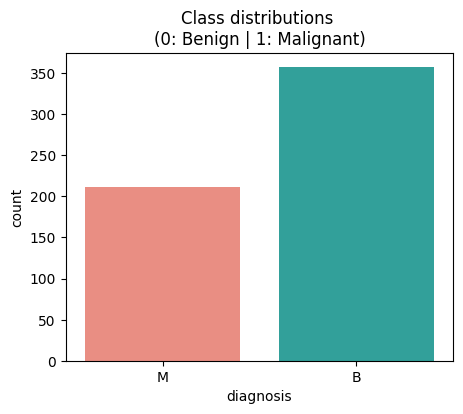

In [232]:
plt.figure(figsize=(5, 4))
sns.countplot(
    data=data,
    x='diagnosis',
    palette={'M': 'salmon', 'B': 'lightseagreen'}
)
plt.title("Class distributions \n(0: Benign | 1: Malignant)")
plt.show()

---

### 🧾 Remove Duplicates

- Drop duplicate rows from the dataset to ensure data quality 🧹  
- Print the total number of duplicates remaining after removal 🔍  
- Display any rows still marked as duplicates (if any)  

In [233]:
data = data.drop_duplicates()
print( f'====================================\n Duplicated = {data.duplicated().sum()} \n====================================') 
data[data.duplicated()]

 Duplicated = 0 


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


---

### 🔄 Encode Target Variable

Convert the categorical target **`diagnosis`** into numeric values for modeling:  
- **M → 1** 🎯 (Malignant / Positive class)  
- **B → 0** 🌿 (Benign / Negative class)  

Check the unique values after replacement to confirm successful encoding ✅  

In [234]:
data.diagnosis.replace({"M":1,"B":0},inplace=True)
data.diagnosis.unique()

array([1, 0])

---

### 🔗 Correlation Analysis

Generate a **heatmap** to visualize feature correlations:  
- Helps identify **strongly correlated features** 🔍  
- Useful for detecting **multicollinearity** ⚠️  
- Color map 🎨: Teal gradient for better readability  
- Annotated values show exact correlation coefficients 📏  

Text(0.5, 1.0, 'Correlation Map')

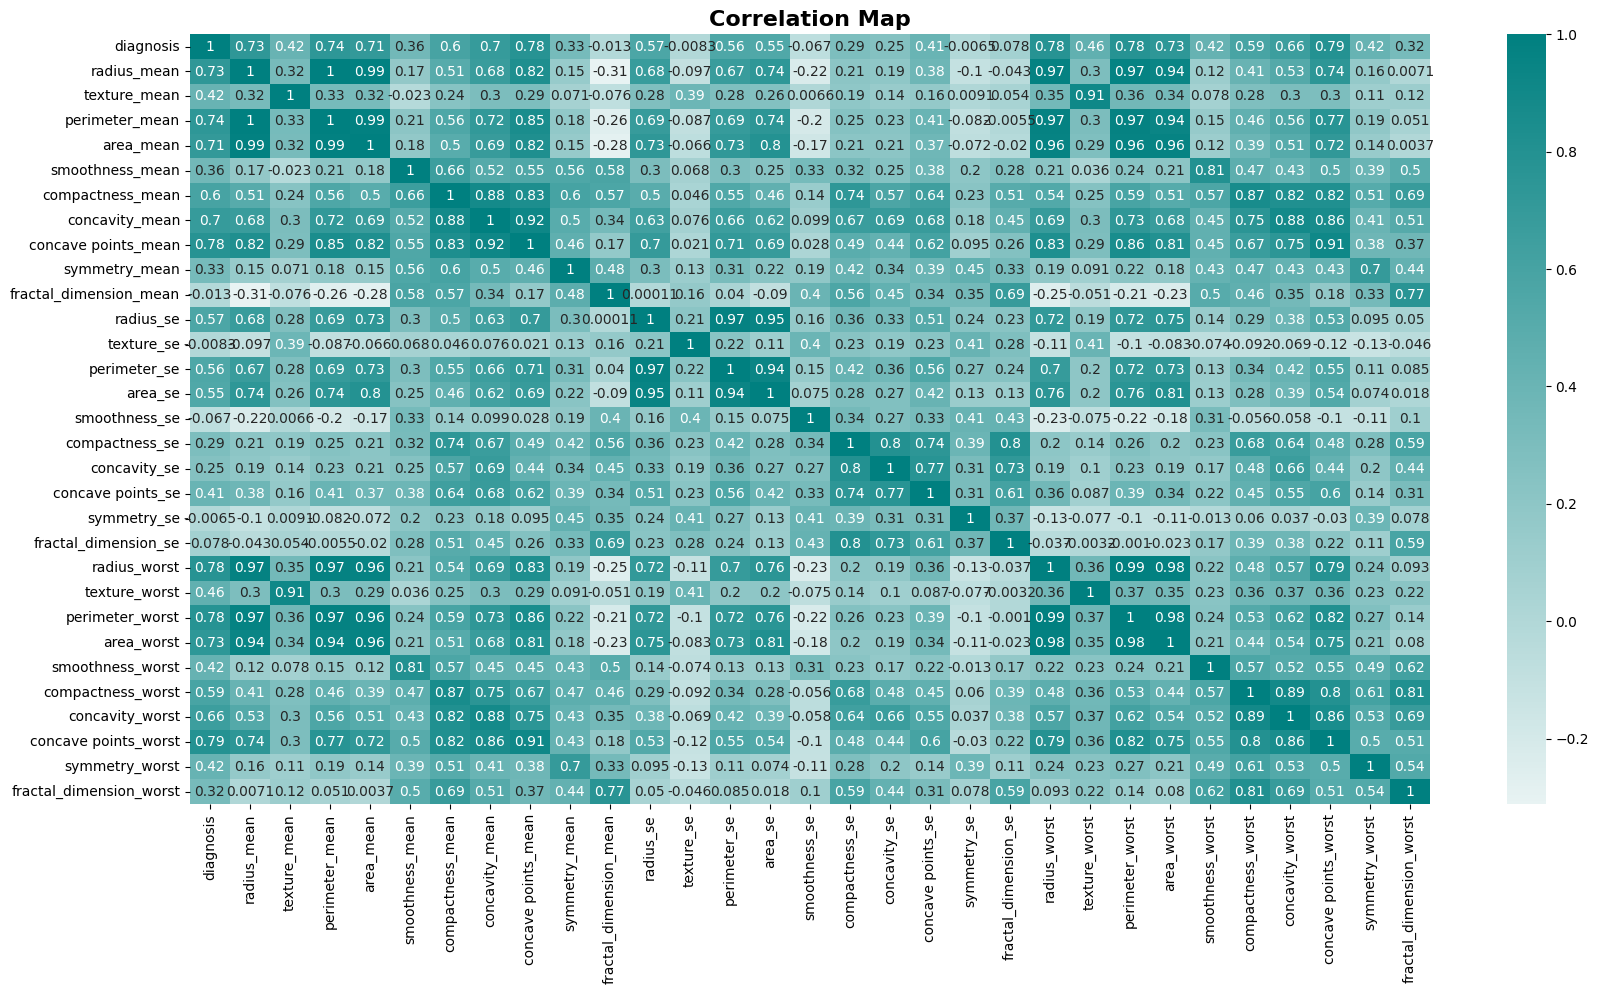

In [235]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap=sns.light_palette("teal",as_cmap=True), annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

---

### ✂️ Split Features and Target

- **X** 📊: Feature set (all columns except `diagnosis`)  
- **y** 🎯: Target variable (`diagnosis`, encoded as 0 = Benign, 1 = Malignant)  

This separation prepares the data for **training and evaluation** of machine learning models.  

In [236]:
X = data.drop(["diagnosis"], axis=1) 
y = data["diagnosis"]

---

### 📏 Feature Scaling

Apply **StandardScaler** to normalize feature values:  
- Transforms features to have **mean = 0** and **standard deviation = 1** ⚖️  
- Ensures all features contribute equally to the model 🤝  
- Prevents bias from variables with larger scales 🔍  

In [237]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---

### 🧪 Train-Test Split

Divide the dataset into **training** and **testing** sets:  
- **80% Training** 🏋️: Used to fit the model  
- **20% Testing** 🧾: Used to evaluate performance on unseen data  
- **Stratify = y** 🎯: Maintains the same class distribution in both sets  
- **Random State = 42** 🔒: Ensures reproducibility  

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

---

### 📈 Logistic Regression (Baseline Model)

Train a **Logistic Regression** classifier:  
- **max_iter=1000** ⏳: Ensures convergence during optimization  
- **class_weight='balanced'** ⚖️: Handles class imbalance by adjusting weights  

Steps:  
1. Fit the model on the **training set** 🏋️  
2. Predict outcomes on the **test set** 🧪  

In [239]:
lr = LogisticRegression(max_iter=1000,class_weight='balanced')

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

---

### 📊 Model Evaluation – Logistic Regression

Evaluate the Logistic Regression model using:  

- **Classification Report** 📝: Shows **precision, recall, f1-score, and support** for each class  
- **Confusion Matrix** 🔢: Summarizes correct vs. incorrect predictions  

This helps assess model performance, especially for the **Malignant (1)** class 🎯.  

In [240]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[71  1]
 [ 2 40]]


---

### 🔍 Hyperparameter Tuning – Logistic Regression

Optimize the **Logistic Regression** model using **GridSearchCV**:  
- **Parameters tuned** ⚙️:  
  - `C`: Regularization strength (0.01 → 10)  
  - `penalty`: Regularization type (`l2`)  
  - `solver`: Optimization algorithm (`lbfgs`, `liblinear`)  
  - `max_iter`: Iterations (500, 1000)  

- **CV = 5** 🔄: 5-fold cross-validation  
- **Scoring = recall** 🎯: Prioritize correctly detecting **Malignant cases (1)**  

Outputs:  
- Best parameters and recall score from GridSearchCV 🏆  
- Test accuracy after applying the optimized model ✅  

In [241]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [500, 1000]
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("\nBest Parameters from GridSearchCV:", grid_search.best_params_)
print("Best Score from GridSearchCV:", grid_search.best_score_)

grid_pred = grid_search.predict(X_test)
print("Test Accuracy after GridSearchCV:", accuracy_score(y_test, grid_pred))


Best Parameters from GridSearchCV: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score from GridSearchCV: 0.9647058823529411
Test Accuracy after GridSearchCV: 0.9736842105263158


---

### 🌲 Random Forest Classifier

Train and evaluate a **Random Forest** model:  
- **Ensemble method** 🤝: Combines multiple decision trees for robust predictions  
- **random_state=42** 🔒: Ensures reproducibility  

Steps:  
1. Fit the model on the **training set** 🏋️  
2. Predict outcomes on the **test set** 🧪  
3. Evaluate performance using:  
   - **Classification Report** 📝 (precision, recall, f1-score)  
   - **Confusion Matrix** 🔢 (true vs. predicted classes)  

In [242]:
RandomForest = RandomForestClassifier(random_state=42)

RandomForest.fit(X_train, y_train)

y_pred_rnd = RandomForest.predict(X_test)

print(classification_report(y_test, y_pred_rnd))
print(confusion_matrix(y_test, y_pred_rnd))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

[[72  0]
 [ 3 39]]


---

### 📊 Support Vector Machine (SVM)

Train and evaluate an **SVM classifier** with:  
- **Kernel = 'rbf'** 🔄: Radial Basis Function for non-linear decision boundaries  
- **probability=True** 🎯: Enables probability estimates (useful for ensembles & ROC curves)  
- **random_state=42** 🔒: For reproducibility  

Steps:  
1. Train the model on the **training set** 🏋️  
2. Predict on the **test set** 🧪  
3. Evaluate with:  
   - **Classification Report** 📝  
   - **Confusion Matrix** 🔢  

In [243]:
SVM = SVC(kernel='rbf', probability=True, random_state=42)

SVM.fit(X_train, y_train)

y_pred_svm = SVM.predict(X_test)

print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

[[72  0]
 [ 3 39]]


---

### ⚡ XGBoost Classifier

Train and evaluate an **XGBoost** model:  
- **n_estimators = 500** 🔢: Number of boosting rounds  
- **learning_rate = 0.1** ⚖️: Step size shrinkage to prevent overfitting  
- **max_depth = 6** 🌳: Maximum depth of trees  
- **eval_metric = 'logloss'** 🧮: Evaluation metric for optimization  
- **use_label_encoder = False** 🚫: Disable deprecated label encoder  
- **random_state = 42** 🔒: For reproducibility  

Steps:  
1. Fit the model on the **training set** 🏋️  
2. Predict outcomes on the **test set** 🧪  
3. Evaluate with:  
   - **Classification Report** 📝  
   - **Confusion Matrix** 🔢  

In [244]:
XGB = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

XGB.fit(X_train, y_train)

y_pred_xgb = XGB.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

[[72  0]
 [ 4 38]]


---

### 🚀 AdaBoost Classifier

Train and evaluate an **AdaBoost** model:  
- **AdaBoost (Adaptive Boosting)** 🔄: Combines multiple weak learners (usually decision stumps) to form a strong classifier  
- Automatically adjusts weights for misclassified samples to improve accuracy ⚖️  

Steps:  
1. Fit the model on the **training data** 🏋️  
2. Predict outcomes on the **test data** 🧪  
3. Evaluate performance using:  
   - **Classification Report** 📝  
   - **Confusion Matrix** 🔢  

In [245]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[72  0]
 [ 2 40]]


---

### 🤖 Model Collection (Model Zoo)

Create a dictionary of different classifiers to compare their performance:  

- **Logistic Regression** 📈  
- **K-Nearest Neighbors (KNN)** 📍 (k=2, uniform weights)  
- **Support Vector Classifier (SVC)** 📊 (RBF kernel)  
- **Decision Tree** 🌳  
- **Random Forest** 🌲 (60 estimators)  
- **Gradient Boosting** 🌟  
- **AdaBoost** 🚀  
- **XGBoost** ⚡  

This setup allows us to **train and evaluate multiple models efficiently** in a loop 🔄.  

In [246]:
key = ['LogisticRegression',
       'KNeighborsClassifier',
       'SVC','DecisionTreeClassifier',
       'RandomForestClassifier',
       'GradientBoostingClassifier',
       'AdaBoostClassifier',
       'XGBClassifier']

value = [LogisticRegression(), 
         KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), 
         SVC(kernel="rbf",random_state=15), 
         DecisionTreeClassifier(random_state=10), 
         RandomForestClassifier(n_estimators=60, random_state=0), 
         GradientBoostingClassifier(random_state=20), 
         AdaBoostClassifier(), 
         XGBClassifier(random_state=0,booster="gbtree")]

models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'SVC': SVC(random_state=15),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
    

---

### 📊 Model Comparison – Accuracy Scores

Train and evaluate each model from the **Model Zoo** 🔄:  
- Fit every algorithm on the **training data** 🏋️  
- Predict outcomes on the **test data** 🧪  
- Calculate **Accuracy Score** ✅ for each model  
- Print results in a clear format for quick comparison 📝  

This helps identify which algorithms perform best on the dataset.  

In [247]:
predicted =[]
print("--------------------------------------")
print("############## Accuracy ##############")
print("--------------------------------------")
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)
    print("-------")

--------------------------------------
############## Accuracy ##############
--------------------------------------
LogisticRegression 0.9649122807017544
-------
KNeighborsClassifier 0.9122807017543859
-------
SVC 0.9736842105263158
-------
DecisionTreeClassifier 0.9210526315789473
-------
RandomForestClassifier 0.9649122807017544
-------
GradientBoostingClassifier 0.9649122807017544
-------
AdaBoostClassifier 0.9824561403508771
-------
XGBClassifier 0.9736842105263158
-------


---

### 💾 Save Model & Preprocessing Artifacts

Store trained components for future deployment:  
- **Logistic Regression model** 📈 → `Logistic_model.pkl`  
- **Scaler (StandardScaler)** 📏 → `scaler.pkl`  
- **Feature list** 🏷️ → `features.pkl`  

Using **joblib** ensures fast and efficient serialization.  
✅ Confirm that the model and preprocessing artifacts have been saved successfully.  

In [248]:
joblib.dump(lr,"../Model/Logistic_model.pkl")
joblib.dump(scaler,"../Scaler/scaler.pkl")
joblib.dump(X.columns.tolist(), "../Features/features.pkl")

print("✅ Model and scaler saved.")

✅ Model and scaler saved.


---

### 🏁 Conclusion

- After experimenting with multiple models (**Logistic Regression, KNN, SVM, Decision Tree, Random Forest, Gradient Boosting, AdaBoost, XGBoost**) 🤖,  
  the **best performing model** was **Logistic Regression** 📈.  

- Key performance metric:  
  - **Recall ≈ 95%** 🎯 → This is especially important in medical diagnosis, since it minimizes the risk of **missing malignant cases** (False Negatives).  

- **Why Logistic Regression?**  
  - Simpler and more interpretable 🔍  
  - Achieved excellent balance between accuracy and recall ⚖️  
  - Lightweight and easy to deploy 🚀  

✅ The project successfully built a reliable model for **Breast Cancer Prediction** with strong generalization performance.  

---

## ✨ Project by: **Ibrahim Mohamed**

📅 **Year:** 2025  
📍 **Field:** Machine Learning & Data Science  

> 💡 *"Turning data into decisions — one model at a time."*

---